In [2]:
import pandas as pd


cleaned_data = pd.read_csv('cleaned_CKD_dataset.csv')

In [3]:
# Separating features and target variable
X = cleaned_data.drop('Class', axis=1)  # Dropping the target column from the features
y = cleaned_data['Class']  # Defining the target variable


In [4]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.naive_bayes import GaussianNB

# Initializing the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Training the model on the training data
nb_model.fit(X_train, y_train)


GaussianNB()

In [6]:
# Predicting on the test data
y_pred = nb_model.predict(X_test)


Accuracy: 93.75%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.96      0.94      0.95        52

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix:
[[26  2]
 [ 3 49]]


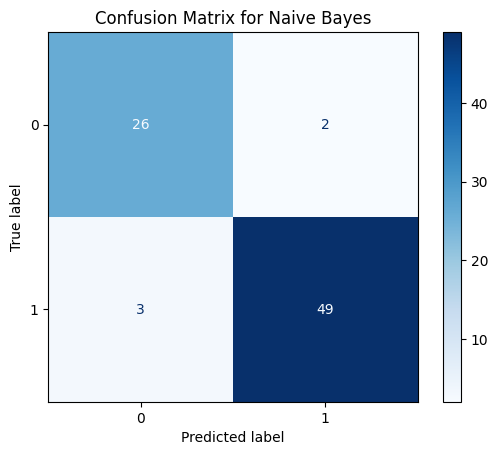

In [ ]:
# Importing necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Initializing and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Making predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Naive Bayes")
plt.show()






In [8]:
from sklearn.dummy import DummyClassifier

# Baseline model predicting the most frequent class
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)

# Evaluating baseline accuracy
baseline_accuracy = accuracy_score(y_test, baseline_pred)
print(f"Baseline Accuracy (most frequent class): {baseline_accuracy * 100:.2f}%")


Baseline Accuracy (most frequent class): 65.00%


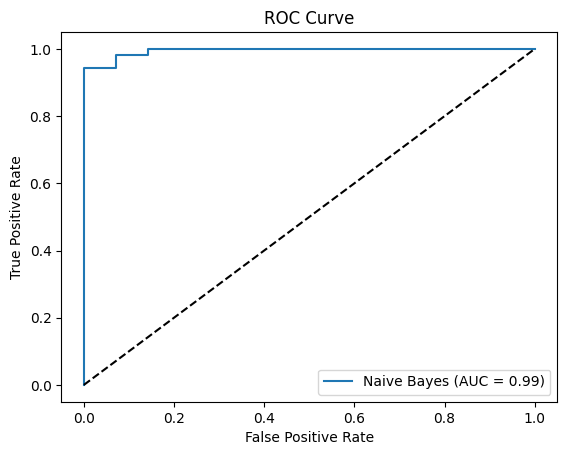

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predicted probabilities for the positive class
y_proba = nb_model.predict_proba(X_test)[:, 1]  # For binary classification

# Calculating the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Plotting the ROC curve
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


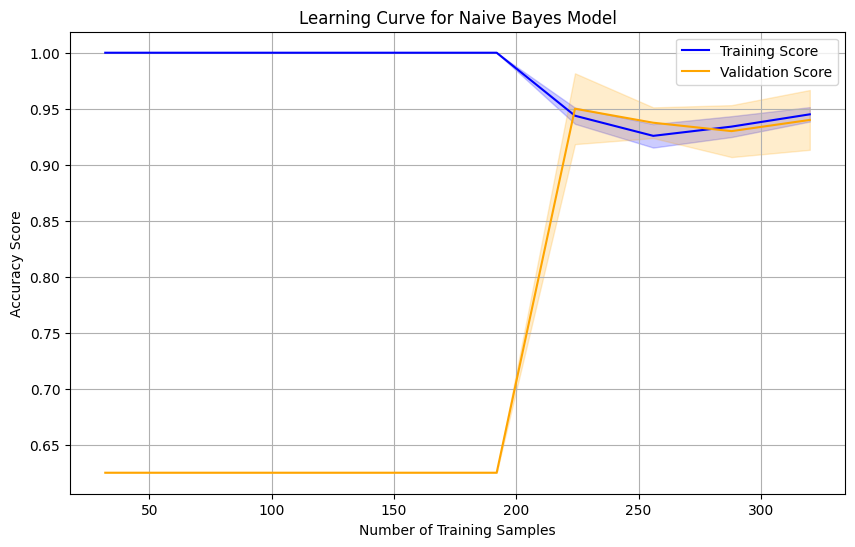

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
import numpy as np



# Defining the model
nb_model = GaussianNB()

# Generating learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    nb_model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculating the mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, val_mean, label="Validation Score", color="orange")

# Filling in the area between mean ± std for training and validation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="orange", alpha=0.2)

# labels and title
plt.title("Learning Curve for Naive Bayes Model")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()


In [11]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation with 5 folds
cv_scores = cross_val_score(nb_model, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}% (+/- {cv_scores.std() * 100:.2f}%)")



Cross-Validation Accuracy: 94.00% (+/- 2.67%)
